# Data Analysis of Acoustics Experiments

### Folder: 7 Units with Defect 10cm

(c) Benjamin Cichos 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 14,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})  

## Data for the tube with different length

In [4]:
freq7,amp7=np.loadtxt('7_unit_with_defect_10cm_notmiddle/7_units_defect_10cm_notmiddle',unpack=True)
peaks7, _ = find_peaks(amp7, distance=20)


In [12]:
freq7h=np.array([590,790,1050,1390,1590,1860,3650,3800,3970,4260,4360,4540,6950,7060,7110,7240,7440,7640])

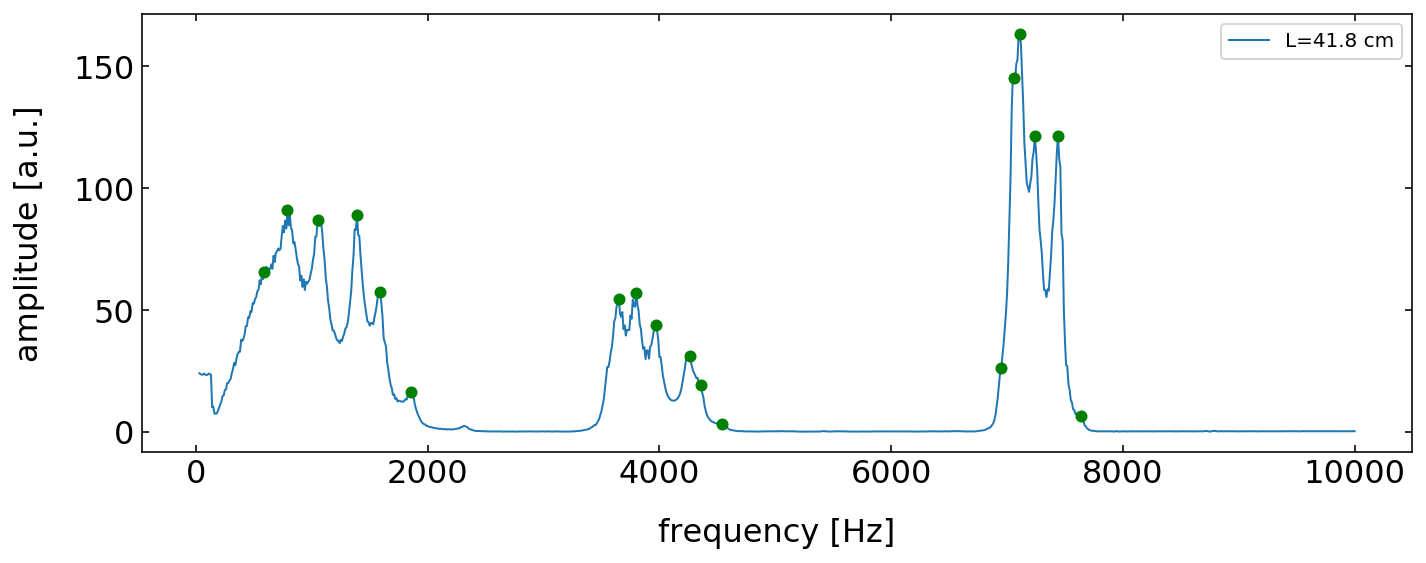

In [13]:
fig=plt.figure(figsize=(10,4))
ax=fig.gca()

plt.plot(freq7,amp7/10000,label='L=41.8 cm')
[plt.plot(freq7h[i],amp7[int(np.where(freq7==freq7h[i])[0])]/10000,'g.') for i in range(len(freq7h))]
#plt.plot(freq7[peaks7],amp7[peaks7]/10000,'.')
plt.ylabel('amplitude [a.u.]')
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [a.u.]')
#plt.ylim(0,20)
plt.tight_layout()
#plt.savefig('resonances_wi_defect.pdf')
plt.show()

### Below is just for reading the maxima by hand.


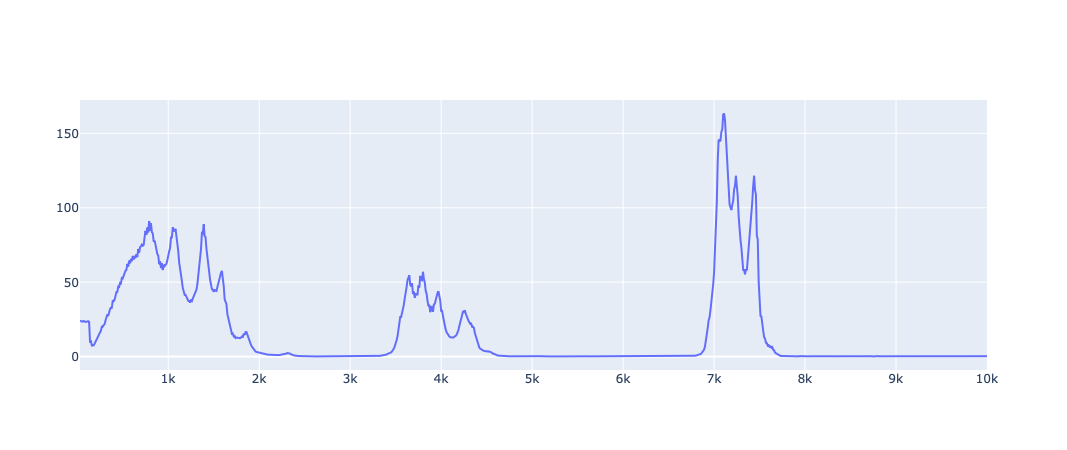

In [14]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=go.Scatter(x=freq7, y=amp7/10000))
fig.show()

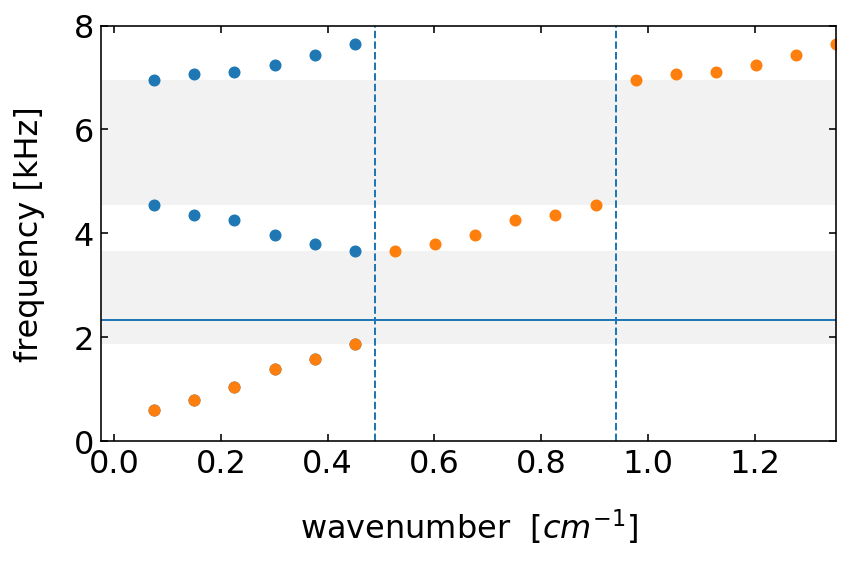

In [27]:
fig=plt.figure(figsize=(6,4))
k7=np.arange(1,len(freq7h)+1)*np.pi/(40+1.8)
k=list(k7[0:6])
k7n=np.array(k+k[::-1]+k)
plt.plot(k7n,np.array(freq7h)/1000,'.')
plt.plot(k7,np.array(freq7h)/1000,'.')
wn=np.linspace(k7.min()-0.1,k7.max(),10)
plt.xlim(k7.min()-0.1,k7.max())
plt.fill_between(wn, freq7h[5]/1000, freq7h[6]/1000,facecolor='gray',alpha=0.1)
plt.fill_between(wn, freq7h[11]/1000, freq7h[12]/1000,facecolor='gray',alpha=0.1)
plt.axvline(x=6.5*np.pi/(40+1.8),ls='--')
plt.axvline(x=12.5*np.pi/(40+1.8),ls='--')
plt.axhline(y=2.33, linestyle='-')
plt.ylim(0,8)
plt.ylabel('frequency [kHz]')
plt.xlabel('wavenumber  [$cm^{-1}$]')
plt.tight_layout()
plt.savefig('zone_with_defect.pdf')
plt.show()